Entos USA Review

In [444]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [445]:
df = pd.read_csv("visits_2020-04-01_2021-12-14.csv")

In [446]:
df = df.drop([0, 1, 2])
df = df.reset_index(drop = True)

En Octubre - 2020 se ve un gran aumento el cual decrece en los proximos meses

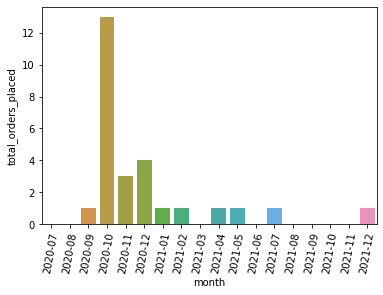

In [447]:
# Timeline total_orders_placed
plt.clf()
sns.barplot(data = df, x = "month", y = "total_orders_placed")
plt.xticks(rotation = 80)
plt.show()

<Figure size 432x288 with 0 Axes>

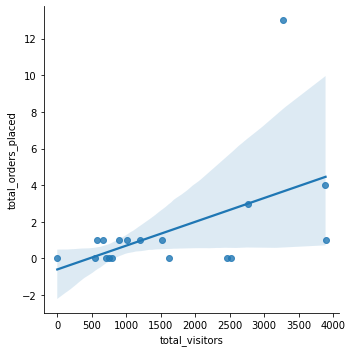

Coeficiente de correlacion: Low Positive 0.5126465862342826


In [448]:
# Total Visitors vs Total Orders Placed
plt.clf()
sns.lmplot(data = df, x = "total_visitors", y = "total_orders_placed")
plt.show()

corr, _ = pearsonr(df.total_visitors, df.total_orders_placed)
print("Coeficiente de correlacion: Low Positive",corr)

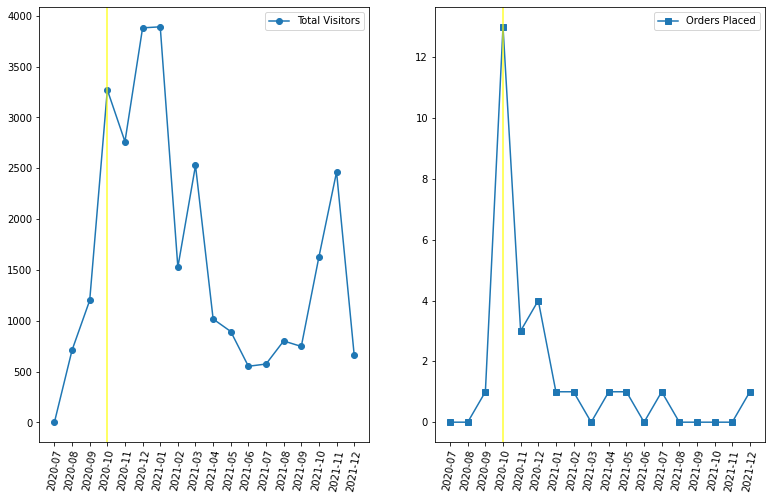

In [449]:
# Total Visitors vs Total Orders Placed
plt.figure(figsize = (13, 8))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(range(len(df.month)), df.total_visitors, label = "Total Visitors", marker = "o")
ax1.axvline(3, color = "yellow", alpha = 0.8)
ax1.set_xticks(range(len(df.month)))
ax1.set_xticklabels(df.month)
plt.xticks(rotation = 80)
plt.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(range(len(df.month)), df.total_orders_placed, label = "Orders Placed", marker = "s")
ax2.axvline(3, color = "yellow", alpha = 0.8)
ax2.set_xticks(range(len(df.month)))
ax2.set_xticklabels(df.month)
plt.xticks(rotation = 80)
plt.legend()

plt.show()

<Figure size 432x288 with 0 Axes>

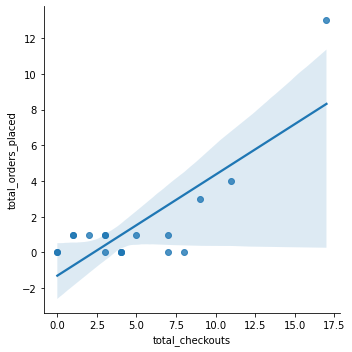

Coeficiente de correlacion: Medium Positive 0.7977782042924295


In [450]:
# Checkouts vs Total Orders Placed
plt.clf()
sns.lmplot(data = df, x = "total_checkouts", y = "total_orders_placed")
plt.show()

corr, _ = pearsonr(df.total_checkouts, df.total_orders_placed)
print("Coeficiente de correlacion: Medium Positive", corr)

In [451]:
# Nuevo documento 
df_loc = pd.read_csv("location_2020-04-01_2021-12-14.csv")

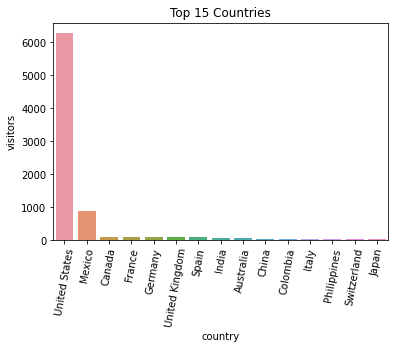

           country  visitors
0    United States      6284
1           Mexico       884
2           Canada       106
3           France        99
4          Germany        89
5   United Kingdom        88
6            Spain        88
7            India        67
8        Australia        55
9            China        43
10        Colombia        42
11           Italy        42
12     Philippines        40
13     Switzerland        31
14           Japan        30


In [452]:
# Estudiar a las visitas en general
# df_loc_gen -> Data Frame incluye todas las visitas en general

df_loc_gen = df_loc.dropna()

# Pais 
# Quiero saber que paises son los que mas visitan la pagina web 
country_value_counts = df_loc_gen.location_country.value_counts().reset_index()
country_value_counts.columns = ["country", "visitors"]
country_value_counts_top10 = country_value_counts[:15]

plt.clf()
sns.barplot(data = country_value_counts_top10, x = "country", y = "visitors")
plt.title("Top 15 Countries")
plt.xticks(rotation= 80)
plt.show()


print(country_value_counts_top10)

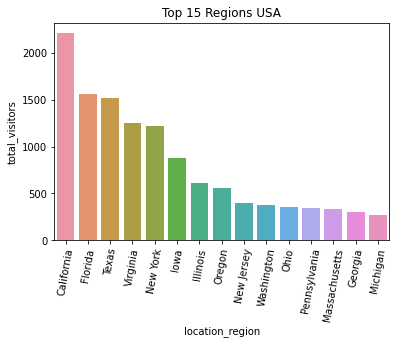

   location_region  total_visitors
0       California            2213
1          Florida            1566
2            Texas            1524
3         Virginia            1251
4         New York            1223
5             Iowa             875
6         Illinois             611
7           Oregon             554
8       New Jersey             403
9       Washington             380
10            Ohio             355
11    Pennsylvania             344
12   Massachusetts             336
13         Georgia             307
14        Michigan             275


In [453]:
# Most visited region in the USA
df_loc_usa = df_loc[df_loc.location_country == "United States"]

df_loc_usa_region = df_loc_usa.groupby("location_region").total_visitors.sum()
df_loc_usa_region = df_loc_usa_region.sort_values(ascending = False)
df_loc_usa_region = df_loc_usa_region.reset_index()

plt.clf()
sns.barplot(data = df_loc_usa_region[:15], x = "location_region", y = "total_visitors")
plt.xticks(rotation = 80)
plt.title("Top 15 Regions USA")
plt.show()

print(df_loc_usa_region[:15])

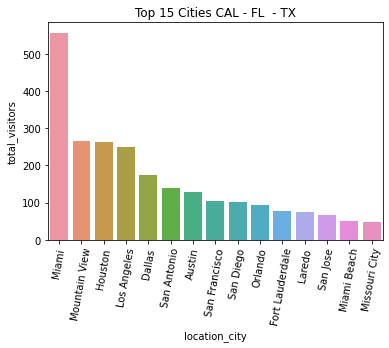

      location_city  total_visitors
0             Miami             557
1     Mountain View             266
2           Houston             263
3       Los Angeles             249
4            Dallas             174
5       San Antonio             139
6            Austin             130
7     San Francisco             104
8         San Diego             102
9           Orlando              95
10  Fort Lauderdale              77
11           Laredo              75
12         San Jose              66
13      Miami Beach              50
14    Missouri City              47


In [454]:
# Cities in California - Florida
regions = ["California", "Florida", "Texas"]
df_loc_cal_fl = df_loc[df_loc.location_region.isin(regions)]
df_loc_cal_fl_cities = df_loc_cal_fl.groupby("location_city").total_visitors.sum()
df_loc_cal_fl_cities = df_loc_cal_fl_cities.sort_values(ascending = False).reset_index()

plt.clf()
sns.barplot(data = df_loc_cal_fl_cities[:15], x = "location_city", y = "total_visitors")
plt.xticks(rotation = 80)
plt.title("Top 15 Cities CAL - FL  - TX")
plt.show()

print(df_loc_cal_fl_cities[:15])


In [455]:
# Estudiar a las visitas que generaron pedido
# df_loc_buy -> Data Frame incluye todas las compras

df_loc_buy = df_loc[df_loc.total_orders_placed > 0]

In [456]:
# Pais con mas compras
# print(df_loc_buy)
df_loc_buy_country = df_loc_buy.groupby("location_country").total_orders_placed.sum()
print(df_loc_buy_country)

location_country
Mexico            2
United States    25
Name: total_orders_placed, dtype: int64


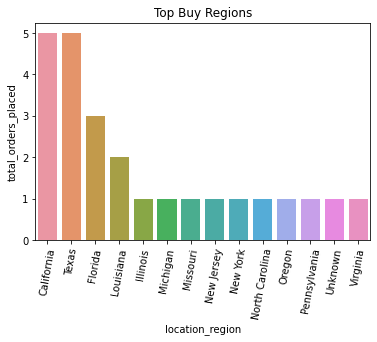

In [467]:
df_loc_buy_usa = df_loc_buy[df_loc_buy.location_country == "United States"].reset_index(drop = True)
df_loc_buy_usa = df_loc_buy_usa.fillna("Unknown")

# Regiones con mas compras
df_loc_buy_usa_region = df_loc_buy_usa.groupby("location_region").total_orders_placed.sum().reset_index()
df_loc_buy_usa_region = df_loc_buy_usa_region.sort_values(by = "total_orders_placed", ascending = False).reset_index(drop = True)

plt.clf()
sns.barplot(data = df_loc_buy_usa_region, x = "location_region", y = "total_orders_placed")
plt.title("Top Buy Regions")
plt.xticks(rotation = 80)
plt.show()



25


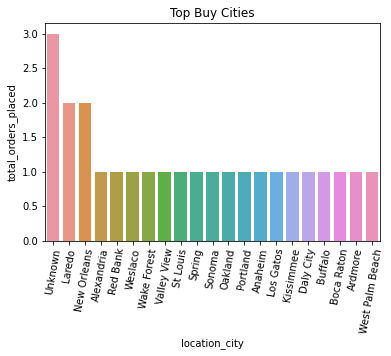

      location_city  total_orders_placed
0           Unknown                    3
1            Laredo                    2
2       New Orleans                    2
3        Alexandria                    1
4          Red Bank                    1
5           Weslaco                    1
6       Wake Forest                    1
7       Valley View                    1
8          St Louis                    1
9            Spring                    1
10           Sonoma                    1
11          Oakland                    1
12         Portland                    1
13          Anaheim                    1
14        Los Gatos                    1
15        Kissimmee                    1
16        Daly City                    1
17          Buffalo                    1
18       Boca Raton                    1
19          Ardmore                    1
20  West Palm Beach                    1
25


In [458]:
# Top Cities
# df_loc_buy_cities = df_loc_buy[df_loc_buy.location_region]
df_loc_buy_cities = df_loc_buy_usa.groupby("location_city").total_orders_placed.sum().reset_index()
df_loc_buy_cities = df_loc_buy_cities.sort_values(by = "total_orders_placed", ascending = False).reset_index(drop = True)

print(np.sum(df_loc_buy_cities.total_orders_placed))

plt.clf()
sns.barplot(data = df_loc_buy_cities, x = "location_city", y = "total_orders_placed")
plt.title("Top Buy Cities")
plt.xticks(rotation = 80)
plt.show()

print(df_loc_buy_cities)
print(np.sum(df_loc_buy_cities.total_orders_placed))

In [459]:
# Review 2020 - 10 
df_loc_10 = df_loc[df_loc.month == "2020-10"].reset_index(drop = True)

In [460]:
# Visitors
# print(df_loc_10)
df_loc_10 = df_loc_10.fillna("Unknown")
df_loc_10 = df_loc_10[df_loc_10.location_country == "United States"]

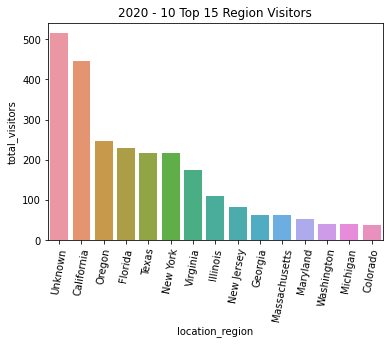

   location_region  total_visitors
0          Unknown             515
1       California             446
2           Oregon             248
3          Florida             229
4            Texas             217
5         New York             216
6         Virginia             174
7         Illinois             111
8       New Jersey              82
9          Georgia              64
10   Massachusetts              62
11        Maryland              53
12      Washington              41
13        Michigan              40
14        Colorado              37


In [461]:
# Region
df_loc_10_region = df_loc_10.groupby("location_region").total_visitors.sum().reset_index()
df_loc_10_region = df_loc_10_region.sort_values( by = "total_visitors", ascending = False).reset_index(drop = True)

plt.clf()
sns.barplot(data = df_loc_10_region[:15], x = "location_region", y = "total_visitors")
plt.xticks(rotation = 80)
plt.title("2020 - 10 Top 15 Region Visitors")
plt.show()

print(df_loc_10_region[:15])

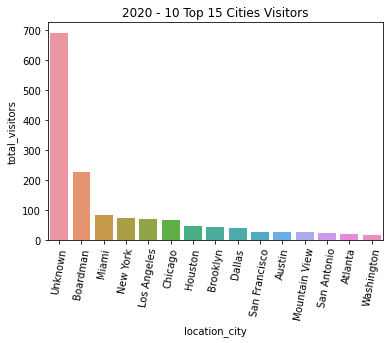

    location_city  total_visitors
0         Unknown             692
1        Boardman             225
2           Miami              82
3        New York              72
4     Los Angeles              69
5         Chicago              67
6         Houston              47
7        Brooklyn              44
8          Dallas              38
9   San Francisco              26
10         Austin              26
11  Mountain View              25
12    San Antonio              22
13        Atlanta              18
14     Washington              17


In [462]:
# Cities
# print(df_loc_10)
df_loc_10_cities = df_loc_10.groupby("location_city").total_visitors.sum().reset_index()
df_loc_10_cities = df_loc_10_cities.sort_values(by = "total_visitors", ascending = False).reset_index(drop = True)

plt.clf()
sns.barplot(data = df_loc_10_cities[:15], x = "location_city", y = "total_visitors")
plt.xticks(rotation = 80)
plt.title("2020 - 10 Top 15 Cities Visitors")
plt.show()

print(df_loc_10_cities[:15])

In [470]:
# Buyers
df_loc_buy_10 = df_loc_10.fillna("Unknown")
df_loc_buy_10 = df_loc_10[df_loc_10.location_country == "United States"]
df_loc_buy_10 = df_loc_buy_10[df_loc_buy_10.total_orders_placed > 0]

print(df_loc_buy_10)

       month    location_city location_region location_country  \
89   2020-10           Sonoma      California    United States   
121  2020-10      New Orleans       Louisiana    United States   
138  2020-10          Oakland      California    United States   
140  2020-10         Portland          Oregon    United States   
273  2020-10       Alexandria        Virginia    United States   
384  2020-10  West Palm Beach         Florida    United States   
398  2020-10      Wake Forest  North Carolina    United States   
565  2020-10        Los Gatos      California    United States   
737  2020-10       Boca Raton         Florida    United States   
749  2020-10         Red Bank      New Jersey    United States   
760  2020-10           Laredo           Texas    United States   
802  2020-10          Ardmore    Pennsylvania    United States   

     total_orders_placed  total_visitors  
89                     1               4  
121                    2              11  
138         

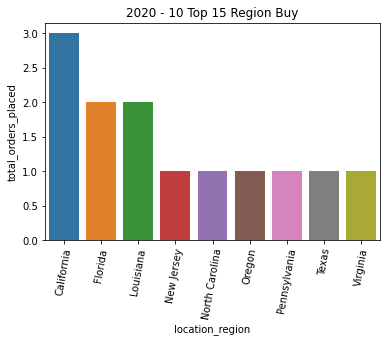

  location_region  total_orders_placed
0      California                    3
1         Florida                    2
2       Louisiana                    2
3      New Jersey                    1
4  North Carolina                    1
5          Oregon                    1
6    Pennsylvania                    1
7           Texas                    1
8        Virginia                    1


In [472]:
# Region
df_loc_buy_10_region = df_loc_buy_10.groupby("location_region").total_orders_placed.sum().reset_index()
df_loc_buy_10_region = df_loc_buy_10_region.sort_values( by = "total_orders_placed", ascending = False).reset_index(drop = True)

plt.clf()
sns.barplot(data = df_loc_buy_10_region[:15], x = "location_region", y = "total_orders_placed")
plt.xticks(rotation = 80)
plt.title("2020 - 10 Top 15 Region Buy")
plt.show()

print(df_loc_buy_10_region[:15])

      location_city  total_orders_placed
0       New Orleans                    2
1        Alexandria                    1
2           Ardmore                    1
3        Boca Raton                    1
4            Laredo                    1
5         Los Gatos                    1
6           Oakland                    1
7          Portland                    1
8          Red Bank                    1
9            Sonoma                    1
10      Wake Forest                    1
11  West Palm Beach                    1


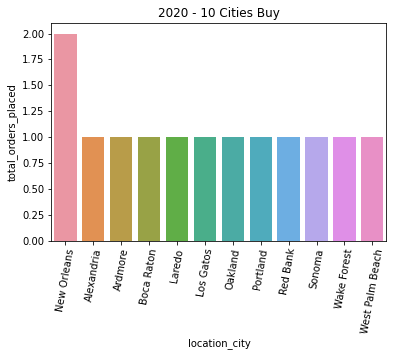

In [479]:
# Cities
df_loc_buy_10_cities = df_loc_buy_10.groupby("location_city").total_orders_placed.sum().reset_index()
df_loc_buy_10_cities = df_loc_buy_10_cities.sort_values(by = "total_orders_placed", ascending = False).reset_index(drop = True)

plt.clf()
sns.barplot(data = df_loc_buy_10_cities, x = "location_city", y = "total_orders_placed")
plt.xticks(rotation = 80)
plt.title("2020 - 10 Cities Buy")
print(df_loc_buy_10_cities)